In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/fifa-2021-complete-player-data/FIFA-21 Complete.csv


In [2]:
import matplotlib.pyplot as plt #importing our visualization libraries
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/fifa-2021-complete-player-data/FIFA-21 Complete.csv',sep = ';') #reading our data which is ';' seperated

In [4]:
df.head()

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid


In [5]:
df.isnull().sum() #checking null values in our data

player_id      0
name           0
nationality    0
position       0
overall        0
age            0
hits           0
potential      0
team           0
dtype: int64

In [6]:
df.dtypes #checking the type of data present in our data frame

player_id       int64
name           object
nationality    object
position       object
overall         int64
age             int64
hits            int64
potential       int64
team           object
dtype: object

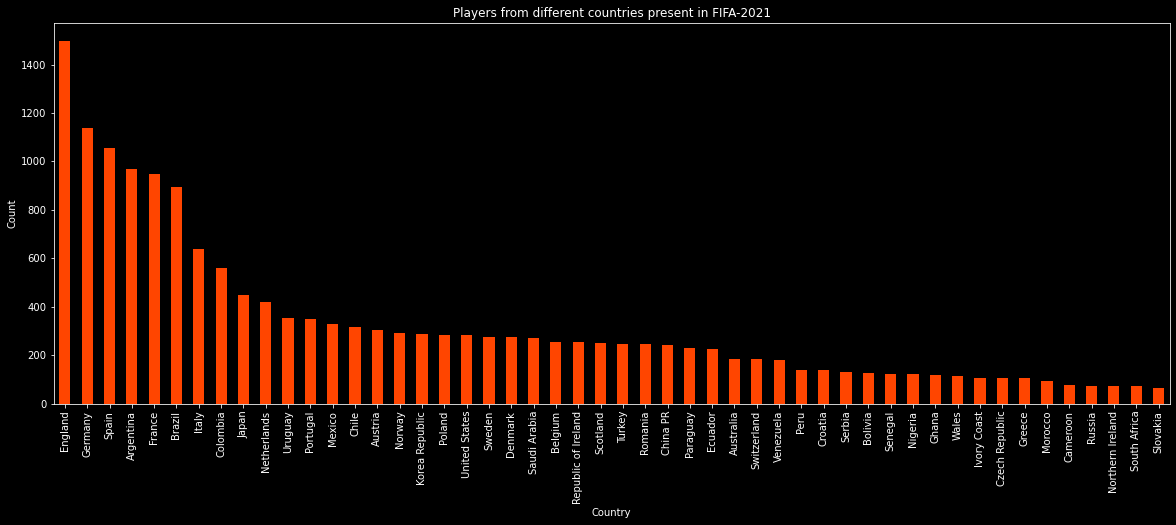

In [7]:
plt.style.use('dark_background') #top 50 nations that the players represent in FIFA 2021
plt.figure(figsize = (20,7))
df['nationality'].value_counts().head(50).plot.bar(color = 'orangered')
plt.title('Players from different countries present in FIFA-2021')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

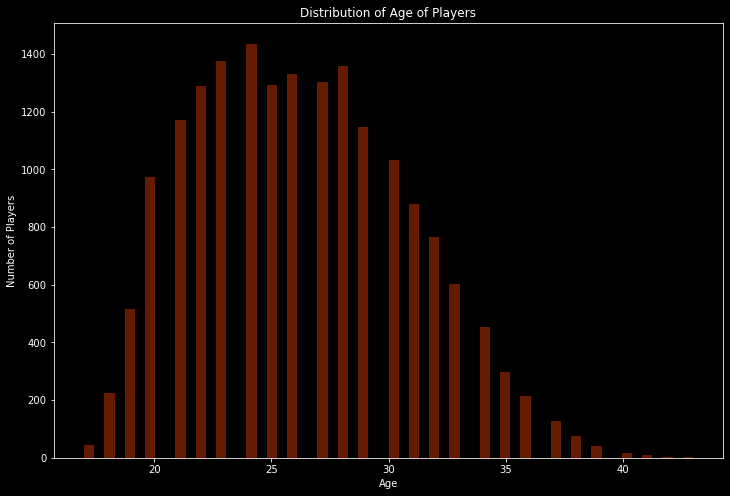

In [8]:
plt.style.use('dark_background') #checking the age distribution of the players in FIFA-2021
age  = df.age
plt.figure(figsize = (12,8))
ax = sns.distplot(age,bins = 60,kde = False,color ='orangered')
ax.set_ylabel('Number of Players')
ax.set_xlabel('Age')
ax.set_title('Distribution of Age of Players')
plt.show()

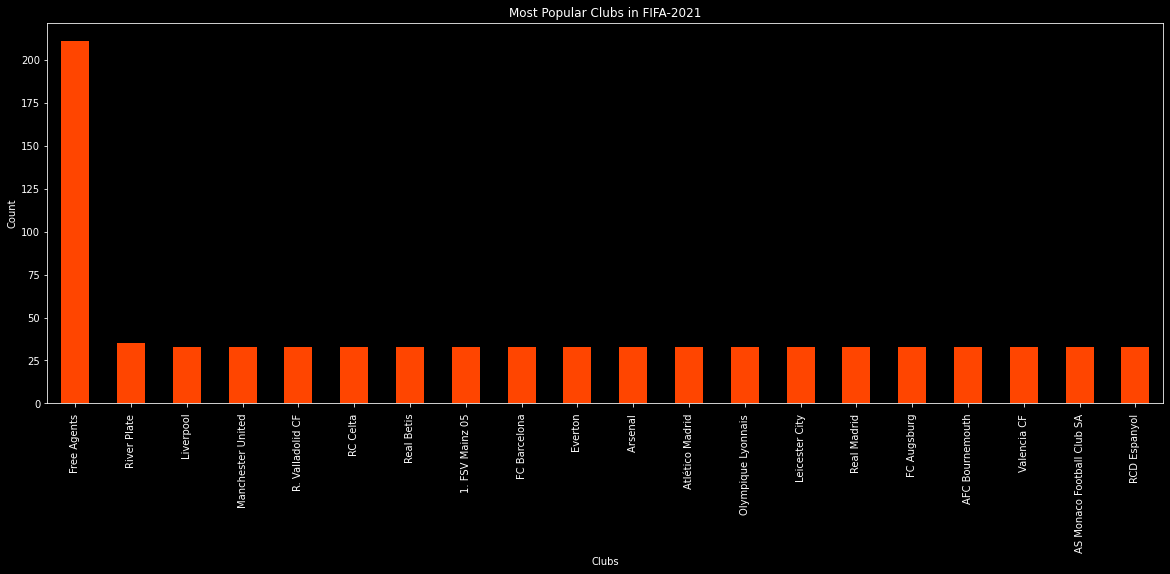

In [9]:
plt.style.use('dark_background') #popular clubs in FIFA-2021
plt.figure(figsize = (20,7))
df['team'].value_counts().head(20).plot.bar(color = 'orangered')
plt.title('Most Popular Clubs in FIFA-2021')
plt.xlabel('Clubs')
plt.ylabel('Count')
plt.show()

In [10]:
df.sort_values('age', ascending = True)[['name', 'age', 'team', 'nationality']].head(10) #The 10 youngest players present in the game

,name,age,team,nationality
1637,Eduardo Camavinga,17,Stade Rennais FC,France
15008,Gabriele Plechero,17,Cittadella,Italy
14915,Jayden Nelson,17,Toronto FC,Canada
17075,Tom Dickson-Peters,17,Norwich City,Scotland
17066,Elias Damergy,17,Stade Rennais FC,Tunisia
17062,Matías Arezo,17,Club Atlético River Plate,Uruguay
16430,Lucas Greno,17,Club Plaza de Deportes Colonia,Uruguay
17040,Simon Ngapandouetnbu,17,Olympique de Marseille,Cameroon
17035,Fidel Ambríz,17,Club León,Mexico
14928,Santiago Cartagena,17,Club Nacional de Football,Uruguay


In [11]:
df.sort_values('age', ascending = False)[['name', 'age', 'team', 'nationality']].head(10) #the top 10 oldest players present in the game

,name,age,team,nationality
13767,Hussain Omar Sulaimani,43,Al Ahli,Saudi Arabia
12887,Leao Butrón,43,Club Alianza Lima,Peru
14977,Luis Fernando Fernández,42,Sociedad Deportiva Aucas,Colombia
222,Gianluigi Buffon,42,Juventus,Italy
726,Hilton,42,Montpellier Hérault SC,Brazil
4150,Cristian Lucchetti,42,Atlético Tucumán,Argentina
8060,Jean-François Gillet,41,Standard de Liège,Belgium
6914,Lee Dong Gook,41,Jeonbuk Hyundai Motors,Korea Republic
16980,Michael Gurski,41,SpVgg Unterhaching,Germany
9252,Robinson Zapata,41,Jaguares Fútbol Club,Colombia


In [12]:
df.groupby(['team'])['age'].mean().sort_values(ascending = True).head(10) #top 10 team with the youngest squad

team
UCD AFC                  21.000000
FC Groningen             22.068966
FC Nordsjælland          22.157895
FC Bayern München II     22.240000
Fortuna Sittard          22.666667
SC Heerenveen            22.869565
KRC Genk                 23.000000
RB Leipzig               23.031250
OGC Nice                 23.115385
AZ                       23.142857
Name: age, dtype: float64

In [13]:
df.groupby(['team'])['age'].mean().sort_values(ascending = False).head(10) #top 10 teams with the oldest squad

team
Beijing Renhe FC                        31.333333
Tianjin Tianhai FC                      30.700000
Mineros de Guayana                      30.333333
Júbilo Iwata                            30.250000
Chongqing Dangdai Lifan FC SWM Team     30.166667
Guangzhou R&F FC                        30.117647
Tianjin TEDA FC                         30.055556
Shanghai Greenland Shenhua FC           30.043478
Perth Glory                             30.000000
Gyeongnam FC                            29.916667
Name: age, dtype: float64

In [14]:
df['position'].value_counts() #checking the different positions and  the number of players playing them

CB              2296
GK              1884
ST              1757
CDM|CM          1546
LB               695
                ... 
ST|RB|RW           1
ST|LWB|LW          1
RB|LWB|LM|LW       1
CB|CF              1
ST|CDM|CM          1
Name: position, Length: 232, dtype: int64

In [15]:
df[df['position'] == 'CB'][['name', 'age', 'team', 'nationality']].head(10) #Top players that only play CB position

,name,age,team,nationality
3,Virgil van Dijk,29,Liverpool,Netherlands
21,Sergio Ramos,34,Real Madrid,Spain
25,Kalidou Koulibaly,29,Napoli,Senegal
33,Piqué,33,FC Barcelona,Spain
34,Giorgio Chiellini,35,Juventus,Italy
37,Aymeric Laporte,26,Manchester City,France
49,Diego Godín,34,Inter,Uruguay
50,Mats Hummels,31,Borussia Dortmund,Germany
54,Thiago Silva,35,Paris Saint-Germain,Brazil
56,Milan Škriniar,25,Inter,Slovakia


In [16]:
df[df['position'] == 'ST'][['name', 'age', 'team', 'nationality']].head(10) #Top players that only play ST position

,name,age,team,nationality
6,Robert Lewandowski,31,FC Bayern München,Poland
12,Sergio Agüero,32,Manchester City,Argentina
15,Harry Kane,27,Tottenham Hotspur,England
19,Luis Suárez,33,FC Barcelona,Uruguay
43,Ciro Immobile,30,Lazio,Italy
62,Timo Werner,24,RB Leipzig,Germany
64,Jamie Vardy,33,Leicester City,England
69,Mauro Icardi,27,Paris Saint-Germain,Argentina
72,Romelu Lukaku,27,Inter,Belgium
78,Edinson Cavani,33,Paris Saint-Germain,Uruguay


In [17]:
df[df['position'] == 'CF'][['name', 'age', 'team', 'nationality']].head(10) #Top players that only play CF position

,name,age,team,nationality
24,Roberto Firmino,28,Liverpool,Brazil
5732,Rodolfo Gamarra,31,CD Cobresal,Paraguay
6213,Tsukasa Morishima,23,Sanfrecce Hiroshima,Japan
10711,Kazushi Mitsuhira,32,Oita Trinita,Japan
12977,Mehdi Zerkane,21,FC Girondins de Bordeaux,France
15919,Shunki Higashi,20,Sanfrecce Hiroshima,Japan
15972,Ren Fujimura,21,Hokkaido Consadole Sapporo,Japan
17163,Brandon Aveiro,18,Crystal Palace,Portugal


In [18]:
df[df['position'] == 'LW'][['name', 'age', 'team', 'nationality']].head(10) #Top players that only play LW position

,name,age,team,nationality
10,Sadio Mané,28,Liverpool,Senegal
58,Leroy Sané,24,Manchester City,Germany
562,Vinícius Jr.,20,Real Madrid,Brazil
773,Prazeracinho,20,Flamengo,Brazil
1009,Davidson,29,Vitória Guimarães,Brazil
1045,Córdoba,23,Athletic Club,Spain
1347,Oussama Idrissi,24,AZ,Morocco
3397,Fernando,21,Shakhtar Donetsk,Brazil
4655,Kristoffer Peterson,25,FC Utrecht,Sweden
5277,Arthur Henrique,26,Gil Vicente FC,Brazil


In [19]:
df[df['position'] == 'RW'][['name', 'age', 'team', 'nationality']].head(10) #Top players that only play RW position

,name,age,team,nationality
372,Steven Berghuis,28,Feyenoord,Netherlands
1012,Calvin Stengs,21,AZ,Netherlands
2341,Thomas Goiginger,27,LASK Linz,Austria
2623,Johnny Russell,30,Sporting Kansas City,Scotland
2779,Dennis Man,21,Fotbal Club FCSB,Romania
2815,Marcus Edwards,21,Vitória Guimarães,England
2846,Mitchell van Bergen,20,SC Heerenveen,Netherlands
2867,Claudiosa Paes,32,São Paulo,Brazil
3534,Aitor,24,FC Twente,Spain
3821,Farid Boulaya,27,Football Club de Metz,Algeria


In [20]:
df[df['position'] == 'GK'][['name', 'age', 'team', 'nationality']].head(10) #Top players that only play GK position

,name,age,team,nationality
4,Jan Oblak,27,Atlético Madrid,Slovenia
8,Alisson,27,Liverpool,Brazil
11,Marc-André ter Stegen,28,FC Barcelona,Germany
20,Manuel Neuer,34,FC Bayern München,Germany
22,Ederson,26,Manchester City,Brazil
27,De Gea,29,Manchester United,Spain
28,Thibaut Courtois,28,Real Madrid,Belgium
32,Samir Handanovic,36,Inter,Slovenia
42,Keylor Navas,33,Paris Saint-Germain,Costa Rica
47,Wojciech Szczesny,30,Juventus,Poland


In [21]:
df[['name', 'age', 'team', 'nationality']].head(10) #Top 10 Players present in the game

,name,age,team,nationality
0,Lionel Messi,33,FC Barcelona,Argentina
1,Cristiano Ronaldo,35,Juventus,Portugal
2,Neymar Jr,28,Paris Saint-Germain,Brazil
3,Virgil van Dijk,29,Liverpool,Netherlands
4,Jan Oblak,27,Atlético Madrid,Slovenia
5,Kevin De Bruyne,29,Manchester City,Belgium
6,Robert Lewandowski,31,FC Bayern München,Poland
7,Eden Hazard,29,Real Madrid,Belgium
8,Alisson,27,Liverpool,Brazil
9,Mohamed Salah,28,Liverpool,Egypt


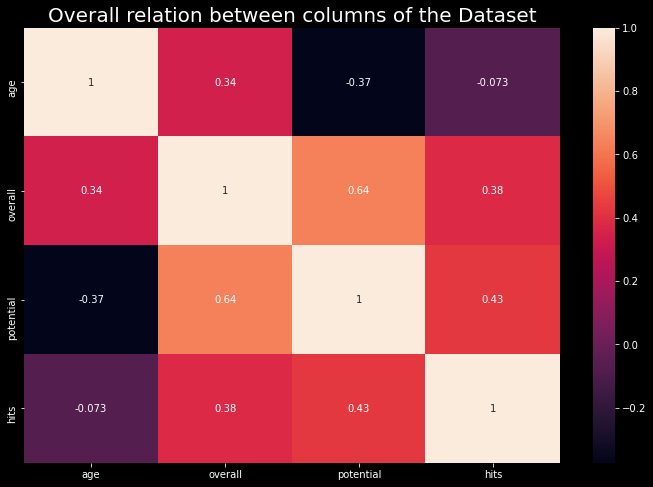

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df[['age', 'nationality', 'overall', 'potential', 'team', 'hits', 'position']].corr(), annot = True) #overall correlation between the various columns present in our data
plt.title('Overall relation between columns of the Dataset', fontsize = 20)
plt.show()

In [23]:
def player(x): #method to check the  individual player information
    return df.loc[df['name']==x]

def country(x): #method to check the information of any country's football team
    return df[df['nationality'] == x][['name','overall','potential','position','hits','age','team']]

def club(x): #method to check the the club's player details
    return df[df['team'] == x][['name','overall','potential','position','hits','age']]
def overall(x): #method to get players with similar overall ratings
        return df[df['overall'] == x][['name','overall','potential','position','hits','age','team']]

In [24]:
player('Cristiano Ronaldo') #checking out Cristiano Ronaldo's stats

,player_id,name,nationality,position,overall,age,hits,potential,team
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus


In [25]:
country('India') #checking the indian Football teams players and their stats

,name,overall,potential,position,hits,age,team
11885,Gajodara Chatterjee,64,64,GK,1,35,Free Agents
13068,Bhadrashree Raj,63,63,RB,1,32,Free Agents
13069,Prakul Bhatt,63,63,ST,3,35,Free Agents
14135,Anvit Swaminathan,62,62,LM|CAM,2,28,Free Agents
14136,Hantidev Bhandari,62,62,RM|LM,0,31,Free Agents
14137,Abhimoda Chakraborty,62,62,CB,0,34,Free Agents
15058,Devindra Pillai,61,61,RM|RW,0,32,Free Agents
15824,Anuvinda Khurana,60,62,CB,2,27,Free Agents
15825,Adit Ginti,60,62,LB|LM,3,26,Free Agents
15826,Remil Nadkarni,60,60,CAM|CF,1,34,Free Agents


In [26]:
club('Real Madrid ') #the club stats for Real Madrid

,name,overall,potential,position,hits,age
7,Eden Hazard,91,91,ST|LW,66,29
17,Toni Kroos,89,89,CM,37,30
18,Luka Modric,89,89,CM,31,34
21,Sergio Ramos,89,89,CB,55,34
26,Casemiro,88,89,CDM,37,28
28,Thibaut Courtois,88,89,GK,34,28
31,Karim Benzema,88,88,ST|CF,51,32
68,Raphaël Varane,86,89,CB,39,27
94,Carvajal,85,85,RB,24,28
98,Isco,85,85,CM|CAM|LW,25,28


In [27]:
overall(86).head(10) #gives us top 10 players with overall rating 86

,name,overall,potential,position,hits,age,team
55,Jadon Sancho,86,94,RM|LM|CAM,300,20,Borussia Dortmund
56,Milan Škriniar,86,90,CB,62,25,Inter
57,Frenkie de Jong,86,92,CM,126,23,FC Barcelona
58,Leroy Sané,86,90,LW,74,24,Manchester City
59,Clément Lenglet,86,90,CB,58,25,FC Barcelona
60,Andrew Robertson,86,89,LB,66,26,Liverpool
61,Bruno Fernandes,86,89,CM|CAM,127,25,Manchester United
62,Timo Werner,86,89,ST,136,24,RB Leipzig
63,Fabinho,86,88,CDM,44,26,Liverpool
64,Jamie Vardy,86,86,ST,43,33,Leicester City


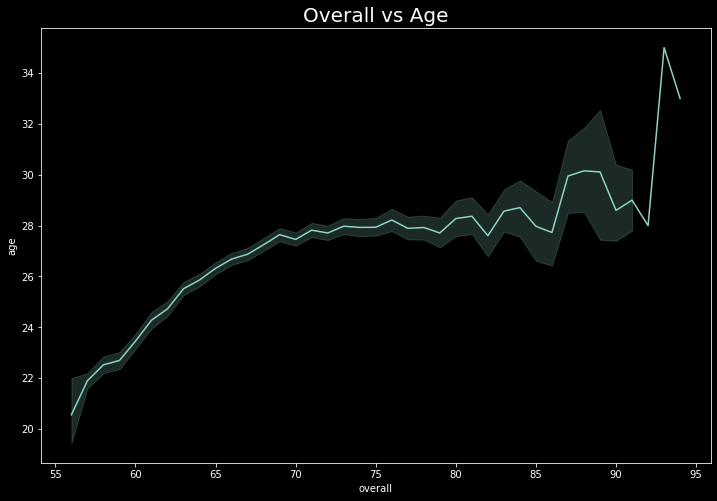

In [28]:
plt.figure(figsize=(12,8)) #comparing overall score of a person versus their age
sns.lineplot(df['overall'], df['age'], palette = "Set1")
plt.title('Overall vs Age', fontsize = 20)
plt.show()

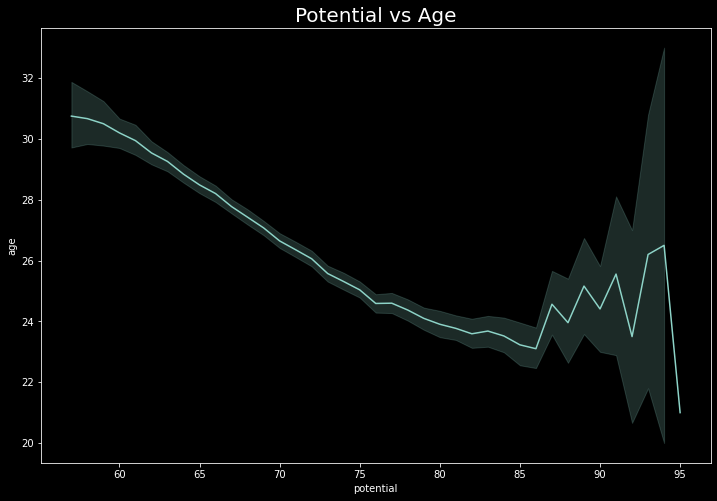

In [29]:
plt.figure(figsize=(12,8)) #comparing potential of a player vs their age
sns.lineplot(df['potential'], df['age'], palette = "Set1")
plt.title('Potential vs Age', fontsize = 20)
plt.show()

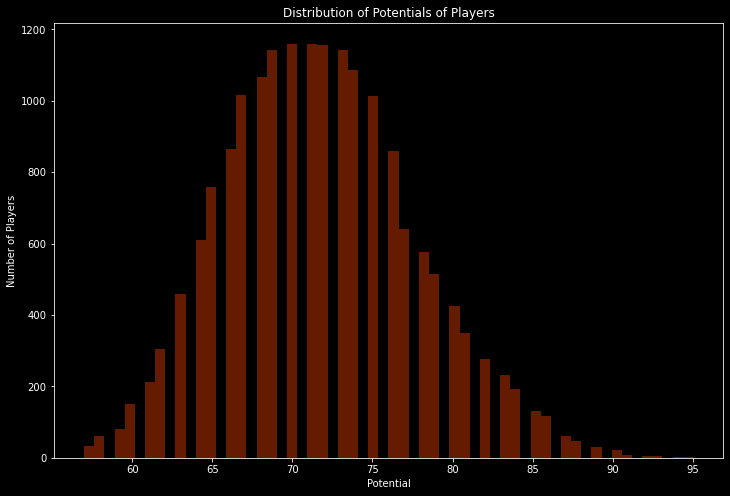

In [30]:
plt.style.use('dark_background') #checking the potential distribution of the players in FIFA-2021
potential  = df.potential
plt.figure(figsize = (12,8))
ax = sns.distplot(potential,bins = 60,kde = False,color ='orangered')
ax.set_ylabel('Number of Players')
ax.set_xlabel('Potential')
ax.set_title('Distribution of Potentials of Players')
plt.show()

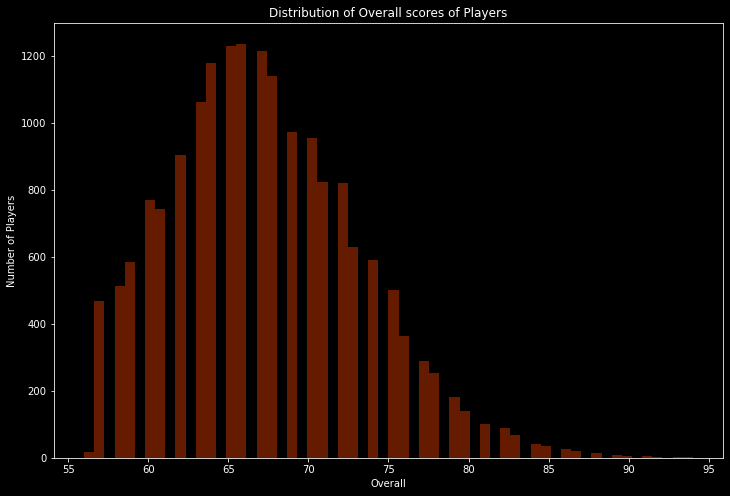

In [31]:
plt.style.use('dark_background') #checking the overall scores distribution of the players in FIFA-2021
overall  = df.overall
plt.figure(figsize = (12,8))
ax = sns.distplot(overall,bins = 60,kde = False,color ='orangered')
ax.set_ylabel('Number of Players')
ax.set_xlabel('Overall')
ax.set_title('Distribution of Overall scores of Players')
plt.show()

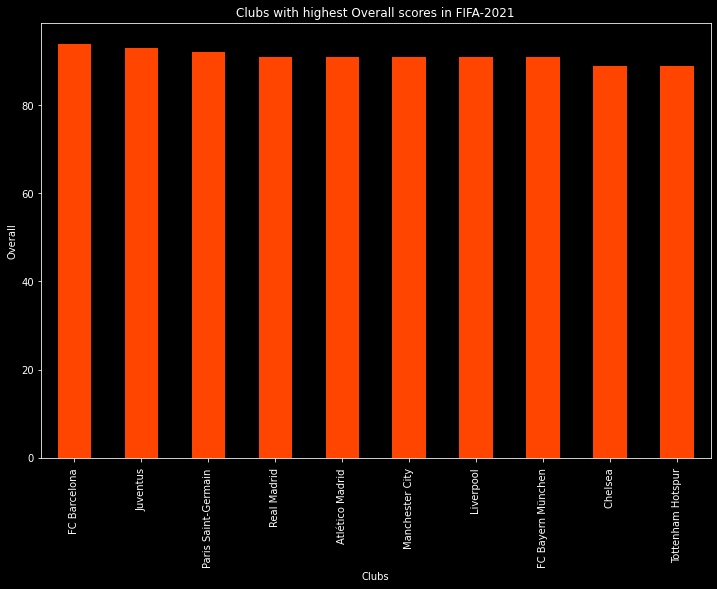

In [32]:
plt.figure(figsize=(12,8)) #checking for the top 10 teams with highest overall scores in the game
ax = df.groupby(['team'])['overall'].max().sort_values(ascending = False).head(10).plot.bar(color='orangered')
ax.set_xlabel('Clubs')
ax.set_ylabel('Overall')
ax.set_title("Clubs with highest Overall scores in FIFA-2021")
plt.show()

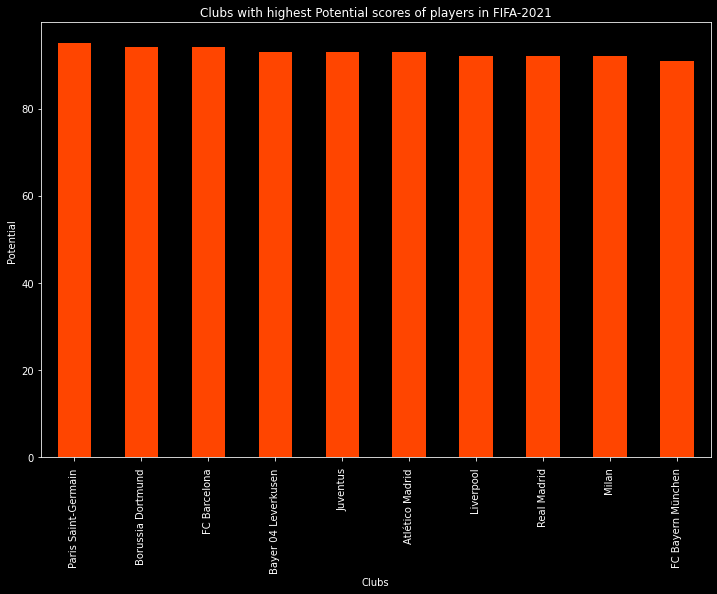

In [33]:
plt.figure(figsize=(12,8)) #checking for the top 10 teams with highest potential scores of players in the game
ax = df.groupby(['team'])['potential'].max().sort_values(ascending = False).head(10).plot.bar(color='orangered')
ax.set_xlabel('Clubs')
ax.set_ylabel('Potential')
ax.set_title("Clubs with highest Potential scores of players in FIFA-2021")
plt.show()

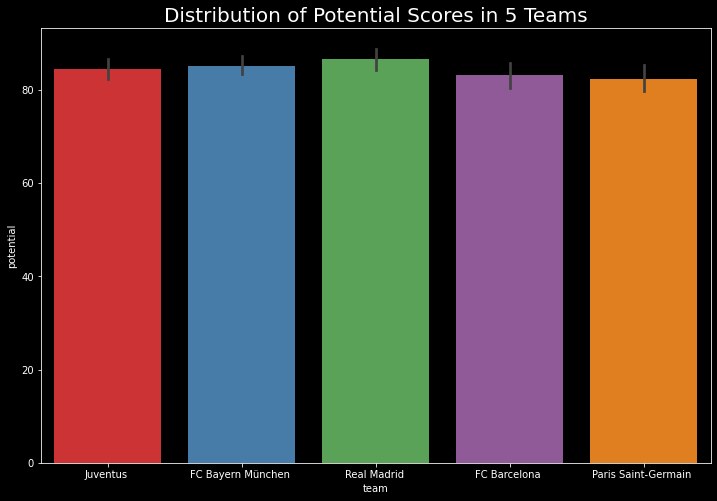

In [34]:
#Top clubs from Europe's Top-5 Leagues with high overall player scores
plt.figure(figsize=(12,8))
top = ('FC Barcelona ', 'Juventus ', 'Paris Saint-Germain ', 'Real Madrid ', 'FC Bayern München ')
df2 = df.loc[df['team'].isin(top)  & df['potential'] ]

ax = sns.barplot(x=df2['team'], y=df2['potential'], palette="Set1");
ax.set_title(label='Distribution of Potential Scores in 5 Teams', fontsize=20);

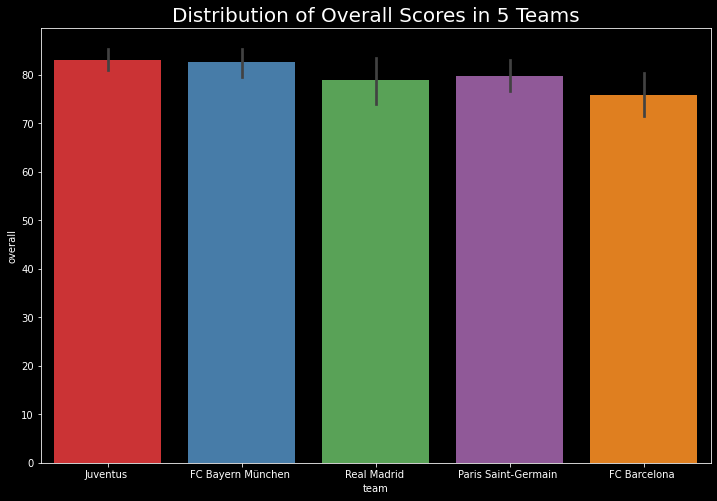

In [35]:
#Top clubs from Europe's Top-5 Leagues with high overall player scores
plt.figure(figsize=(12,8))
top = ('FC Barcelona ', 'Juventus ', 'Paris Saint-Germain ', 'Real Madrid ', 'FC Bayern München ')
df2 = df.loc[df['team'].isin(top)  & df['overall'] ]

ax = sns.barplot(x=df2['team'], y=df2['overall'], palette="Set1");
ax.set_title(label='Distribution of Overall Scores in 5 Teams', fontsize=20);

In [36]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
rating = pd.DataFrame(df.groupby(['nationality'])['overall'].sum().reset_index())
count = pd.DataFrame(rating.groupby('nationality')['overall'].sum().reset_index())

plot = [go.Choropleth(
            colorscale = 'inferno',
            locationmode = 'country names',
            locations = count['nationality'],
            text = count['nationality'],
            z = count['overall'],
)]

layout = go.Layout(title = 'Country vs Overall Ratings of players belonging to them')

fig = go.Figure(data = plot, layout = layout)
py.iplot(fig)

In [37]:
rating = pd.DataFrame(df.groupby(['nationality'])['potential'].sum().reset_index())
count = pd.DataFrame(rating.groupby('nationality')['potential'].sum().reset_index())

plot = [go.Choropleth(
            colorscale = 'inferno',
            locationmode = 'country names',
            locations = count['nationality'],
            text = count['nationality'],
            z = count['potential'],
)]

layout = go.Layout(title = 'Country vs Potential Ratings of players belonging to them')

fig = go.Figure(data = plot, layout = layout)
py.iplot(fig)

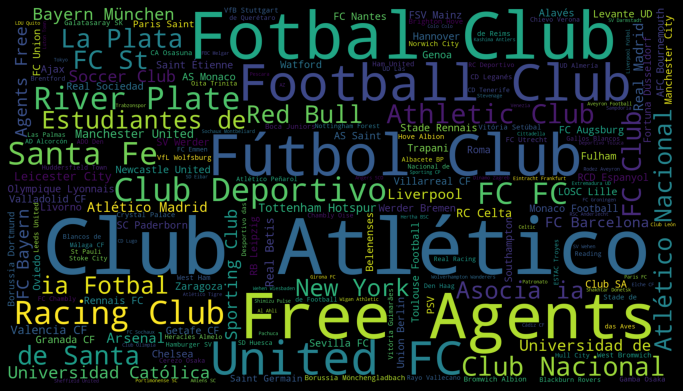

In [38]:
from wordcloud import WordCloud
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.team))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

This concludes my analysis and visualization on the FIFA-2021 data-set. I would like to thank [Roshan Sharma](https://www.kaggle.com/roshansharma) whose notebooks i referred for some of the graphs. It was really great working on this data and you should try working with this too.